In [ ]:

import numpy as np
from scipy import stats
from scipy import ndimage as ndi
import pandas
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels import tsa

from imfun.filt import l1spline, l2spline
from tqdm import tqdm

import sympy as sy

\begin{equation}
F = \sum_j\phi_j[Ca{j}G]\
\end{equation}

\begin{equation}
G_{j} = G[Ca]\beta_{j}/(1+\sum_{h=1}^{4}(Ca)^{h}\beta_{h})
\end{equation}

In [ ]:
def ar1(alpha = 0.74):
    "Simple auto-regression model"
    randn = np.random.randn
    prev = randn()
    while True:
        res = prev*alpha + randn()
        prev = res
        yield res



In [20]:
import numpy as np

b1 = 25
b2 = 2.06
b3 = 0.192
b4 = 35.4
F = 100
g = 7.4 #uM
b_raw = [b1,b2,b3,b4]

phi = [1,1,1,81]
ksi = np.dot(phi, b_raw)

b_raw2 = [b4, b2, b3, b1-g*ksi, F]
ca_free = np.roots(b_raw2)
print (ca_free)



[-4.24829354e+00+7.32226503j -4.24829354e+00-7.32226503j
  8.43372109e+00+0.j          4.67389666e-03+0.j        ]


In [ ]:
ca_total = ca + g*h_raw/(1+h_raw)

Text(0, 0.5, 'Ca, uM')

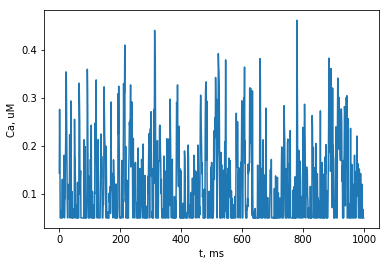

In [44]:
#концентрация кальция
import numpy as np
from array import array
def conc(alpha = 0.74, L=800):
    camin=0.05 #uM минимальное значение
    ran = np.random.randn
    prev = abs(ran())+0.1
    calc=array('f')
    i=1
    while  0 < i <=L: 
        i=i+1
        ca = alpha*prev+ran()*0.1
        if ca<camin:
            ca=camin
        prev = ca
        calc.append(ca)
    return calc

myarray=conc(0.74, 1000)
plt.plot(myarray)
plt.xlabel('t, ms')
plt.ylabel('Ca, uM')

Text(0, 0.5, 'F')

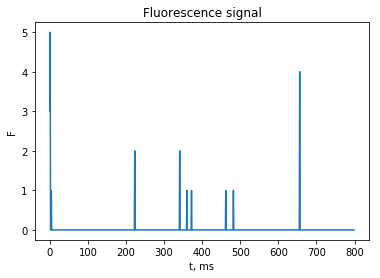

In [43]:
# 1) концентрация кальция
# 2) мат ожидание числа фотонов с учётом GCaMP (его постоянной концентрации), без учёта соотношения 1GCaMP = 4[Ca]2+
# 3) флуоресценция (стохастическая модель по пуассону)
import numpy as np
from array import array
import scipy as scipy
from scipy.stats import poisson
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
#1
def conc(alpha = 0.74, L=800):
    camin=0.05 #uM минимальное значение
    ran = np.random.randn
    prev = abs(ran())+0.1
    calc=array('f')
    i=1
    while  0 < i <=L: 
        i=i+1
        ca = alpha*prev+ran()*0.1
        if ca<camin:
            ca=camin
        prev = ca
        calc.append(ca)
    return calc

myarray=np.array(conc(0.74, 800), dtype=float)

#2
g = 0.7 #uM - GCaMP
phio= 2
F_var = myarray*2//g
#3
F = np.random.poisson(F_var)
plt.plot(F)

plt.title('Fluorescence signal')
plt.xlabel('t, ms')
plt.ylabel('F')